In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data

In [2]:
house_data = pd.read_csv('house_data.csv')


/Users/martinalexandersson/Dev/hemnet/venv/lib/python3.6/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


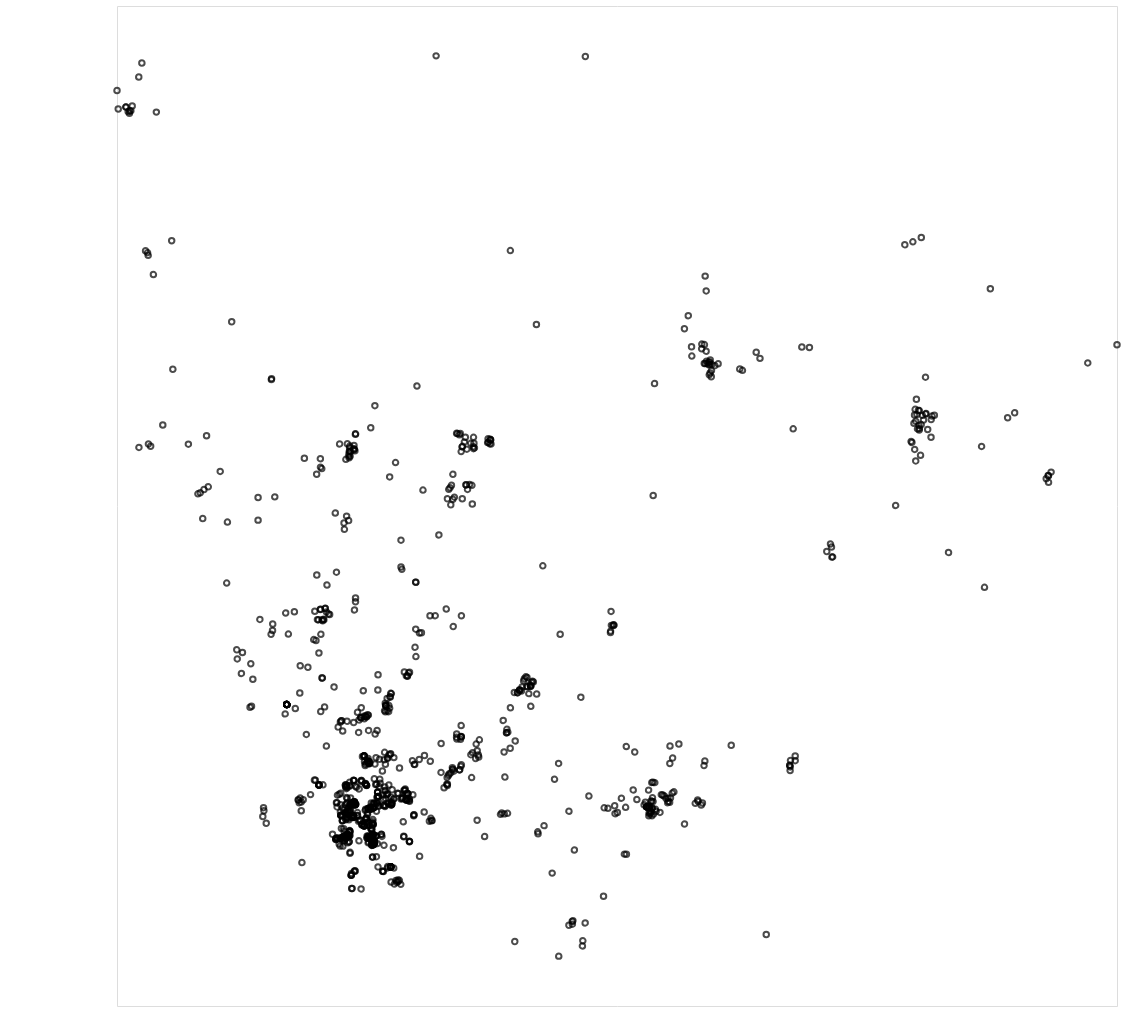

In [7]:
states = alt.topo_feature(data.countries.url, 'states')
capitals = data.us_state_capitals.url

## US states background
#background = alt.Chart(states).mark_geoshape(
#    fill='lightgray',
#    stroke='white'
#).properties(
#    title='US State Capitols',
#    width=700,
#    height=400
#).project('albersUsa')

# Points and text
hover = alt.selection(type='single', on='mouseover', nearest=True,
                      fields=['lat', 'lon'])

base = alt.Chart(house_data.iloc[0:1000],height = 1000,width = 1000).encode(
    longitude='lon:Q',
    latitude='lat:Q'
)

text = base.mark_text(dy=-5, align='right').encode(
    alt.Text('address', type='nominal'),
    opacity=alt.condition(~hover, alt.value(0), alt.value(1))
)

points = base.mark_point().encode(
    color=alt.value('black'),
    size=alt.condition(~hover, alt.value(30), alt.value(100))
).add_selection(hover)

points + text

In [4]:
house_data.columns

Index(['Antal rum', 'Avgift/månad', 'Begärt pris', 'Boarea', 'Byggår',
       'Driftskostnad', 'Förening', 'Pris per kvadratmeter', 'Prisutveckling',
       'address', 'coordinate', 'id', 'map_url', 'price', 'sale_date', 'type',
       'url', 'Biarea', 'Tomtarea', 'lat', 'lon'],
      dtype='object')

In [6]:
house_data['address']

0                           Björkhagegatan 6
1                            Ekebackevägen 1
2                          Agnebäcksvägen 24
3                          Tvåöringsgränd 12
4                            Lergöksgatan 15
5                               Irisgatan 4A
6                            Vänortsgatan 30
7                            Saxofongatan 14
8                                Hökvägen 23
9                        Tritongatan 4, 55 +
10                             Odengatan 145
11                         Druveforsvägen 20
12                       Tilda Gladers väg 2
13                            Runslingan 105
14                               Svanvik 424
15                         Fruktträdsgatan 7
16                       Gröna Annas gata 13
17                             Rödklövern 7D
18                               Bomgatan 6B
19                     Räntmästaregatan 21 C
20                           Alfridas väg 10
21                      Hällebergsvägen 19 E
22        